# WIKI (word cloud for visuals and Vectorizaiton for Analysis)

## STRANGER

In [427]:
import wikipedia

wikipedia.search("Stranger Things", results=10, suggestion=False)

['Stranger Things',
 'Eleven (Stranger Things)',
 'Stranger Things (season 4)',
 'List of Stranger Things episodes',
 'Vecna (Stranger Things)',
 'Stranger Things (season 3)',
 'List of Stranger Things characters',
 'Stranger Things (season 1)',
 'Stranger Things (season 2)',
 'Stranger Things: The First Shadow']

In [428]:
page = wikipedia.WikipediaPage("Stranger Things (season 3)").content
print(page)
# this gets text content from the page https://en.wikipedia.org/wiki/Stranger_Things_(season_3)

The third season of the American science fiction horror television series Stranger Things was released worldwide on the streaming service Netflix on July 4, 2019. The series was created by the Duffer Brothers, who also serve as executive producers along with Shawn Levy, Dan Cohen and Iain Paterson. It was preceded by season 2 and succeeded by season 4. 
The season stars Winona Ryder, David Harbour, Finn Wolfhard, Millie Bobby Brown, Gaten Matarazzo, Caleb McLaughlin, Noah Schnapp, Sadie Sink, Natalia Dyer, Charlie Heaton, Joe Keery, Dacre Montgomery, Maya Hawke, Priah Ferguson, and Cara Buono. Brett Gelman, Francesca Reale, Cary Elwes, Alec Utgoff, and Andrey Ivchenko appear in recurring roles. The season received positive reviews from critics, who praised the visuals, humor, performances, and emotional weight, though some criticized its excessive pop culture references and narrative structure.


== Premise ==
In the summer of 1985, in Hawkins, the newly opened Starcourt Mall has becom

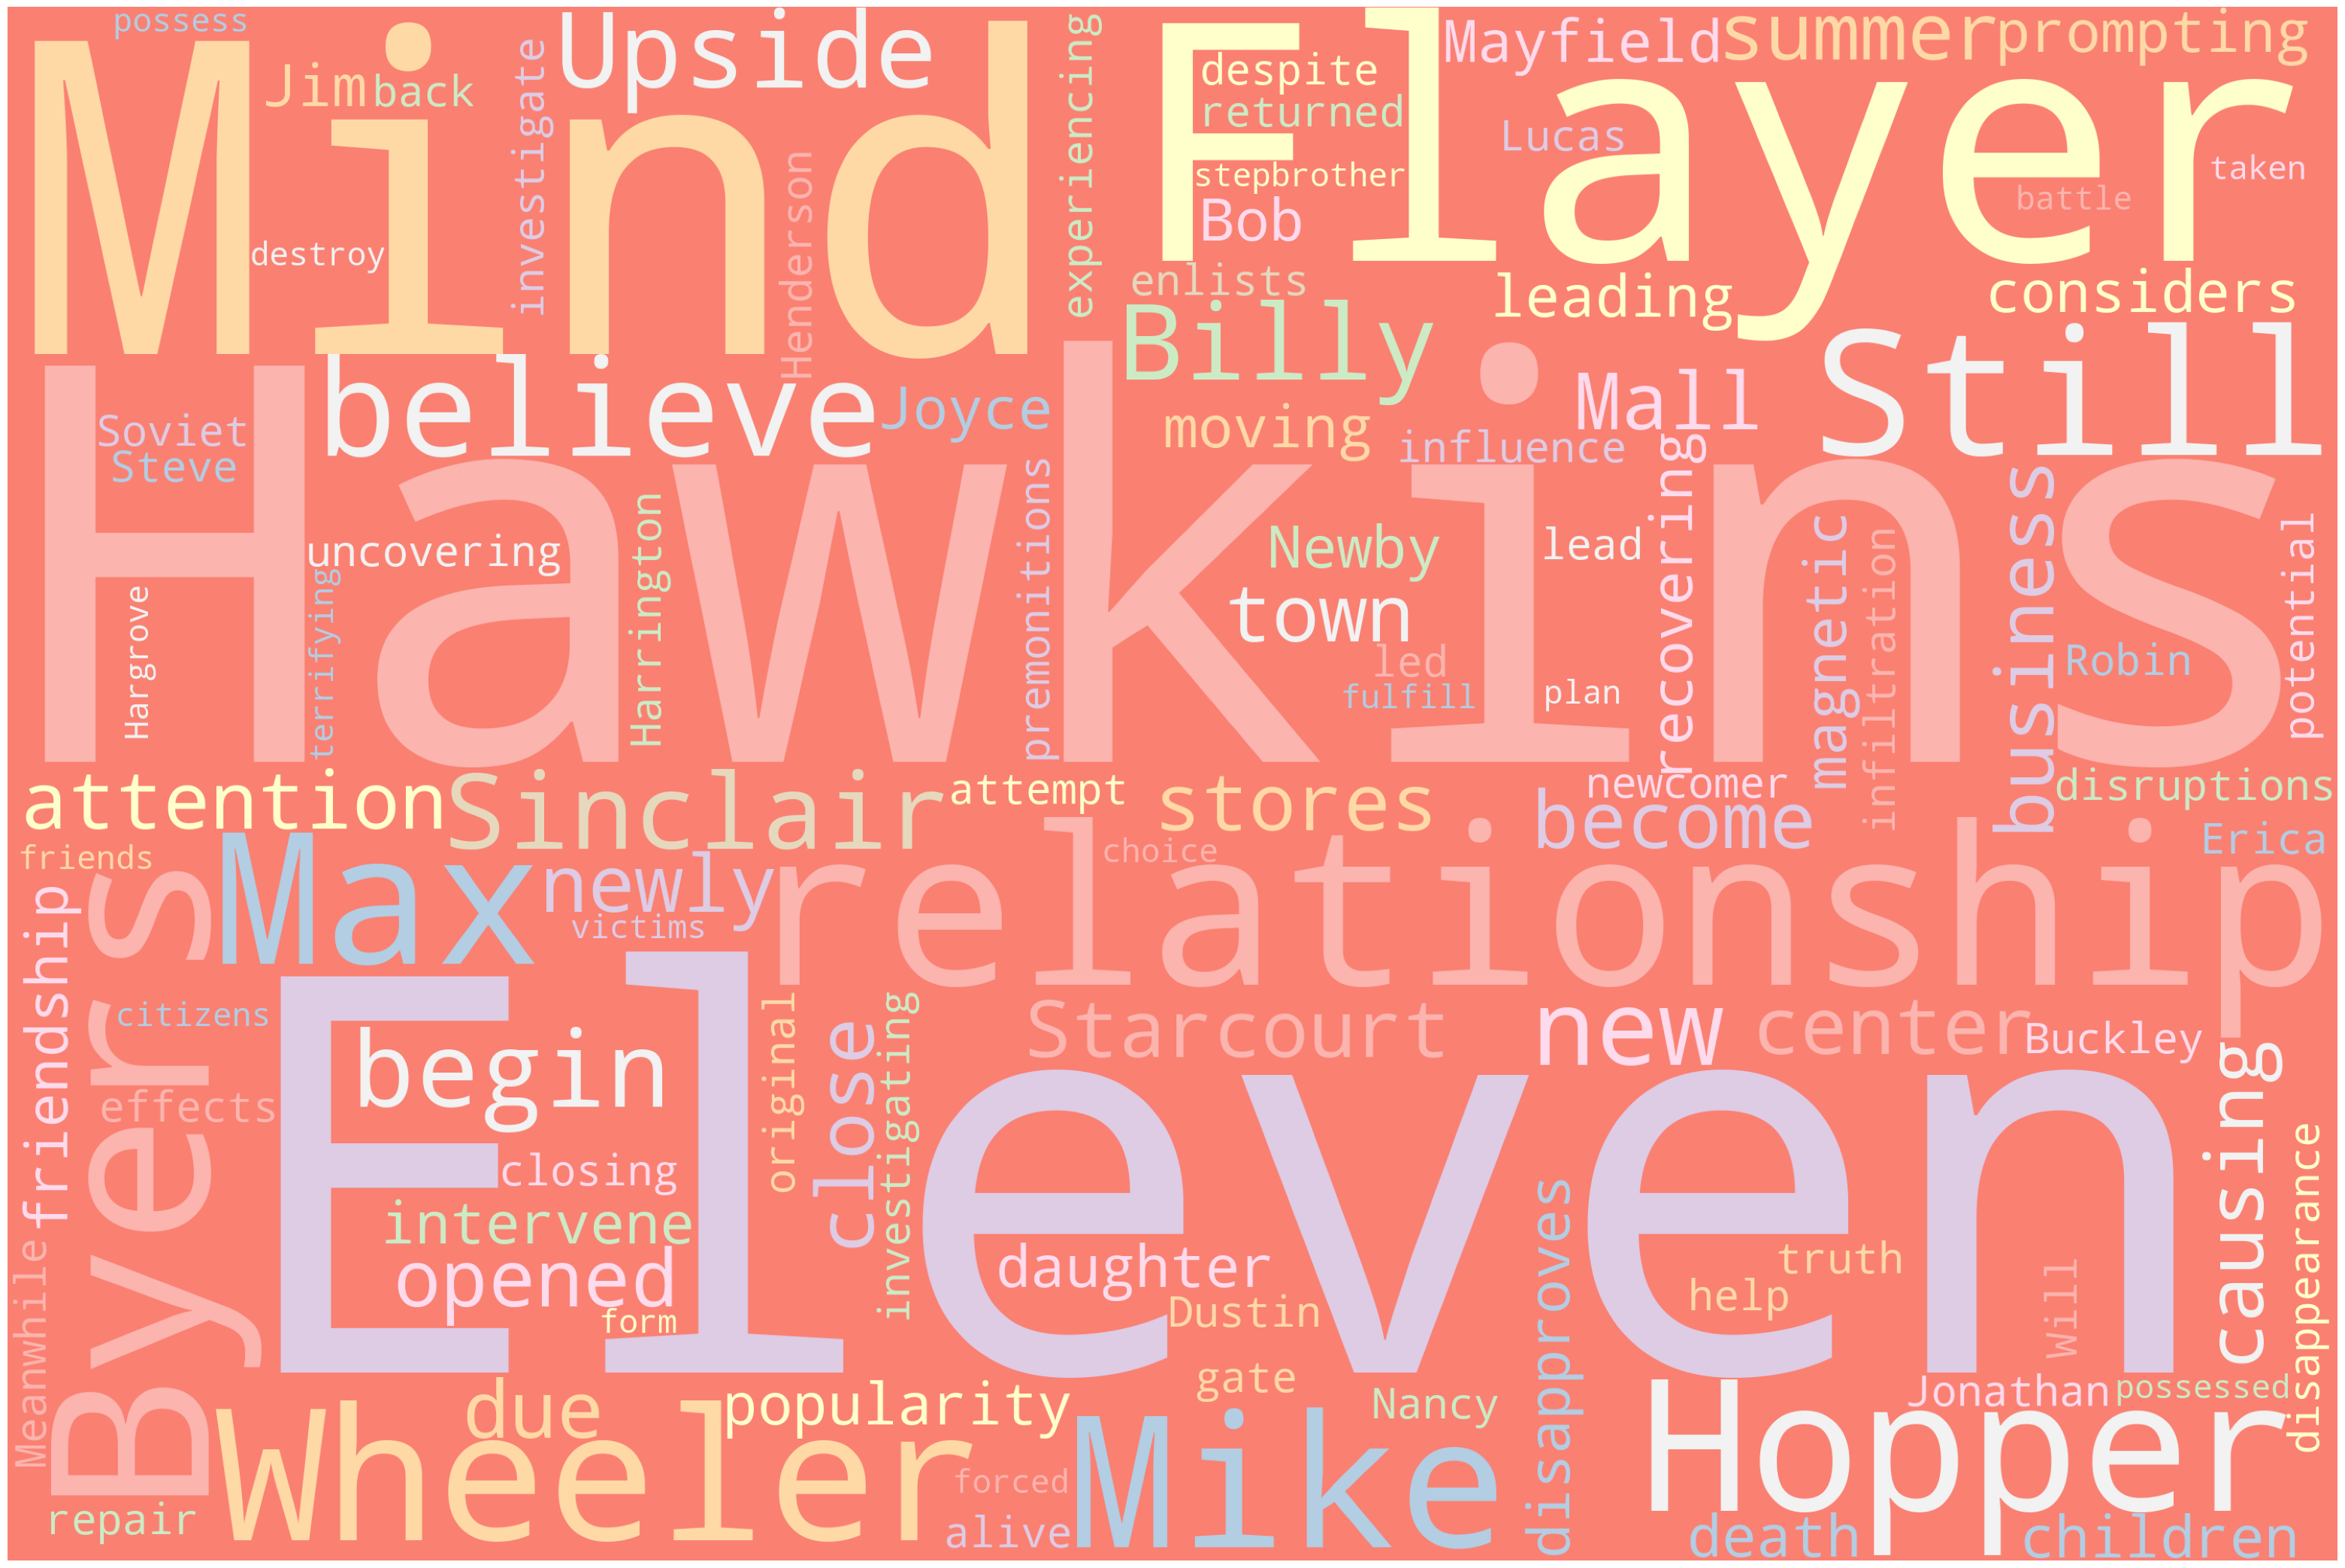

In [429]:
# MODIFIED FROM 
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

strangerPage = "In the summer of 1985, in Hawkins, the newly opened Starcourt Mall has become the center of attention in town, causing other stores to close their business due to its popularity. Jim Hopper disapproves of Mike Wheeler's relationship with his daughter Eleven, prompting him to intervene in their relationship, and leading to Eleven's friendship with Max Mayfield. Still recovering from Bob Newby's death, Joyce Byers considers moving out of Hawkins with her children. However, magnetic disruptions lead her to believe that the Upside Down has returned, so she enlists Hopper's help in uncovering the truth. While Mike and Lucas Sinclair attempt to repair his relationship with Eleven, Will Byers begins experiencing premonitions from the Upside Down, despite Eleven's closing of the original gate that led to his disappearance. He believes the Mind Flayer is still alive and back in Hawkins. As Nancy Wheeler and Jonathan Byers investigate the effects of the Mind Flayer's influence, Dustin Henderson, Steve Harrington, newcomer Robin Buckley, and Erica Sinclair begin investigating a potential Soviet infiltration of Hawkins. Meanwhile, Max's stepbrother Billy Hargrove is taken over by the Mind Flayer, forced to possess other citizens of Hawkins to fulfill the Mind Flayer's new plan. Eleven and her friends have no choice but to battle Billy, the other possessed victims, and destroy the Mind Flayer in its new and terrifying form, once and for all."
generate_word_cloud(strangerPage)

In [430]:
### IMPORT PACKAGES 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import string 
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# #FILTER OUT UNWANTED WORDS
new_text=""

StrangePage = "In the summer of 1985, in Hawkins, the newly opened Starcourt Mall has become the center of attention in town, causing other stores to close their business due to its popularity. Jim Hopper disapproves of Mike Wheeler's relationship with his daughter Eleven, prompting him to intervene in their relationship, and leading to Eleven's friendship with Max Mayfield. Still recovering from Bob Newby's death, Joyce Byers considers moving out of Hawkins with her children. However, magnetic disruptions lead her to believe that the Upside Down has returned, so she enlists Hopper's help in uncovering the truth. While Mike and Lucas Sinclair attempt to repair his relationship with Eleven, Will Byers begins experiencing premonitions from the Upside Down, despite Eleven's closing of the original gate that led to his disappearance. He believes the Mind Flayer is still alive and back in Hawkins. As Nancy Wheeler and Jonathan Byers investigate the effects of the Mind Flayer's influence, Dustin Henderson, Steve Harrington, newcomer Robin Buckley, and Erica Sinclair begin investigating a potential Soviet infiltration of Hawkins. Meanwhile, Max's stepbrother Billy Hargrove is taken over by the Mind Flayer, forced to possess other citizens of Hawkins to fulfill the Mind Flayer's new plan. Eleven and her friends have no choice but to battle Billy, the other possessed victims, and destroy the Mind Flayer in its new and terrifying form, once and for all."

for word in nltk.tokenize.word_tokenize(StrangePage):
    if word not in nltk.corpus.stopwords.words('english'):
        if word in [".",",","!","?",":",";"]:
            #remove the last space
            new_text=new_text[0:-1] + word + " "
        else: #add a space
            new_text += word.lower() + " "
StrangePage=new_text
print(StrangePage)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


in summer 1985, hawkins, newly opened starcourt mall become center attention town, causing stores close business due popularity. jim hopper disapproves mike wheeler 's relationship daughter eleven, prompting intervene relationship, leading eleven 's friendship max mayfield. still recovering bob newby 's death, joyce byers considers moving hawkins children. however, magnetic disruptions lead believe upside down returned, enlists hopper 's help uncovering truth. while mike lucas sinclair attempt repair relationship eleven, will byers begins experiencing premonitions upside down, despite eleven 's closing original gate led disappearance. he believes mind flayer still alive back hawkins. as nancy wheeler jonathan byers investigate effects mind flayer 's influence, dustin henderson, steve harrington, newcomer robin buckley, erica sinclair begin investigating potential soviet infiltration hawkins. meanwhile, max 's stepbrother billy hargrove taken mind flayer, forced possess citizens hawkins

In [431]:
# WEEK 5
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd


sia = SentimentIntensityAnalyzer()
StrangePage = "in summer 1985, hawkins, newly opened starcourt mall become center attention town, causing stores close business due popularity. jim hopper disapproves mike wheeler 's relationship daughter eleven, prompting intervene relationship, leading eleven 's friendship max mayfield. still recovering bob newby 's death, joyce byers considers moving hawkins children. however, magnetic disruptions lead believe upside down returned, enlists hopper 's help uncovering truth. while mike lucas sinclair attempt repair relationship eleven, will byers begins experiencing premonitions upside down, despite eleven 's closing original gate led disappearance. he believes mind flayer still alive back hawkins. as nancy wheeler jonathan byers investigate effects mind flayer 's influence, dustin henderson, steve harrington, newcomer robin buckley, erica sinclair begin investigating potential soviet infiltration hawkins. meanwhile, max 's stepbrother billy hargrove taken mind flayer, forced possess citizens hawkins fulfill mind flayer 's new plan. eleven friends choice battle billy, possessed victims, destroy mind flayer new terrifying form,." 
score=sia.polarity_scores(StrangePage)

print("SCORE:",score)
#WORDS
print("---WORDS---")

scoring = []
for word in StrangePage.split():
    scores = sia.polarity_scores(word)
    scoring.append({**{'Word': word}, **scores})  # Combine word with its score
    #print(words)
    strangerdf = pd.DataFrame(scoring)
    print(strangerdf.head)

SCORE: {'neg': 0.119, 'neu': 0.759, 'pos': 0.122, 'compound': -0.128}
---WORDS---
<bound method NDFrame.head of   Word  neg  neu  pos  compound
0   in  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of      Word  neg  neu  pos  compound
0      in  0.0  1.0  0.0       0.0
1  summer  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of      Word  neg  neu  pos  compound
0      in  0.0  1.0  0.0       0.0
1  summer  0.0  1.0  0.0       0.0
2   1985,  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of        Word  neg  neu  pos  compound
0        in  0.0  1.0  0.0       0.0
1    summer  0.0  1.0  0.0       0.0
2     1985,  0.0  1.0  0.0       0.0
3  hawkins,  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of        Word  neg  neu  pos  compound
0        in  0.0  1.0  0.0       0.0
1    summer  0.0  1.0  0.0       0.0
2     1985,  0.0  1.0  0.0       0.0
3  hawkins,  0.0  1.0  0.0       0.0
4     newly  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of        Word  neg 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


<bound method NDFrame.head of             Word  neg  neu  pos  compound
0             in  0.0  1.0  0.0    0.0000
1         summer  0.0  1.0  0.0    0.0000
2          1985,  0.0  1.0  0.0    0.0000
3       hawkins,  0.0  1.0  0.0    0.0000
4          newly  0.0  1.0  0.0    0.0000
5         opened  0.0  1.0  0.0    0.0000
6      starcourt  0.0  1.0  0.0    0.0000
7           mall  0.0  1.0  0.0    0.0000
8         become  0.0  1.0  0.0    0.0000
9         center  0.0  1.0  0.0    0.0000
10     attention  0.0  1.0  0.0    0.0000
11         town,  0.0  1.0  0.0    0.0000
12       causing  0.0  1.0  0.0    0.0000
13        stores  0.0  1.0  0.0    0.0000
14         close  0.0  1.0  0.0    0.0000
15      business  0.0  1.0  0.0    0.0000
16           due  0.0  1.0  0.0    0.0000
17   popularity.  0.0  0.0  1.0    0.4767
18           jim  0.0  1.0  0.0    0.0000
19        hopper  0.0  1.0  0.0    0.0000
20   disapproves  0.0  1.0  0.0    0.0000
21          mike  0.0  1.0  0.0    0.0000
22  

In [432]:
strangerdf = strangerdf[strangerdf["Word"].str.contains("'s") == False] 
print(strangerdf.shape)
#strangerdf.to_csv("../websitedata/Histranger.csv")


(143, 5)


In [ ]:
# use count vectorizer to retrieve one-hot encodings
count_vectorizer = CountVectorizer(min_df = 2)

corpus = tweets_df['text'].to_list()
Y = tweets_df['sentiment_label']

Xs = count_vectorizer.fit_transform(corpus)   
X = np.array(Xs.todense())

maxs = np.max(X, axis = 0)
X = np.ceil(X / maxs)

print(X.shape)

In [433]:
#move to algsbackup
from sklearn.feature_extraction.text import CountVectorizer

# RUN COUNT VECTORIZER ON OUR CORPUS 
vectorizer = CountVectorizer()

vocabulary = strangerdf["Word"]

Xs  =  vectorizer.fit_transform(vocabulary)   

# VOCABULARY DICTIONARY
vocab = vectorizer.vocabulary_
vocab = vectorizer.get_feature_names_out()

#dictionary = pd.DataFrame(list(vocabulary.items()), columns=["Word", "Number"])
#words = list(vocab.keys())  # List of words
#numbers = list(vocab.values())  # List of corresponding numbers
words = vocab
numbers = range(len(vocab))

# Create separate Series for words and numbers
word_series = pd.Series(words, name='Word')
number_series = pd.Series(numbers, name='Number')

#vocabulary = pd.DataFrame({'Word': vocabulary})
word_series.reset_index(drop=True, inplace=True)  # Reset the index for proper alignment
number_series.reset_index(drop=True, inplace=True)  # Reset the index for proper alignment

# Concatenate vocabulary with dictionary
wordsdf = pd.concat([word_series, number_series], axis=1)
wordsdf = wordsdf.drop(wordsdf.columns[[0]], axis=1)

print(wordsdf.shape)
print(wordsdf.head)


(113, 1)
<bound method NDFrame.head of      Number
0         0
1         1
2         2
3         3
4         4
..      ...
108     108
109     109
110     110
111     111
112     112

[113 rows x 1 columns]>


In [434]:
# MINI CLEANING

import pandas as pd
#strangerdf = pd.read_csv("../websitedata/stranger.csv")

#strangerdf["sentiment"] = strangerdf["compound"].apply(lambda x: "Pos" if x > 0.5 else "Neg" if x < 0.0 else "NA")
#strangerdf = strangerdf.drop(columns={"Unnamed: 0", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9"})
#Strangerdf = strangerdf.dropna()

wordsdf.reset_index(drop=True, inplace=True)  # Reset the index for proper alignment
strangerdf.reset_index(drop=True, inplace=True)  # Reset the index for proper alignment

# Add Vectorized letters
strangerdf = pd.concat([wordsdf, strangerdf], axis=1)

#strangerdf = strangerdf.drop(strangerdf.columns[[0,2,3]], axis=1)

print(strangerdf.shape)
print(strangerdf)
#strangerdf.to_csv("../websitedata/LOOKOUT.csv")


(143, 6)
     Number        Word  neg  neu  pos  compound
0       0.0          in  0.0  1.0  0.0    0.0000
1       1.0      summer  0.0  1.0  0.0    0.0000
2       2.0       1985,  0.0  1.0  0.0    0.0000
3       3.0    hawkins,  0.0  1.0  0.0    0.0000
4       4.0       newly  0.0  1.0  0.0    0.0000
..      ...         ...  ...  ...  ...       ...
138     NaN        mind  0.0  1.0  0.0    0.0000
139     NaN      flayer  0.0  1.0  0.0    0.0000
140     NaN         new  0.0  1.0  0.0    0.0000
141     NaN  terrifying  1.0  0.0  0.0   -0.5719
142     NaN      form,.  0.0  1.0  0.0    0.0000

[143 rows x 6 columns]


# MANIFEST

In [435]:
import wikipedia

wikipedia.search("Manifest", results=10, suggestion=False)

['Manifest',
 'Manifest destiny',
 'Democracy Manifest',
 'Manifest (TV series)',
 'Manifest (transportation)',
 'Manifest (convention)',
 'Manifest file',
 'Manifest!',
 'List of Manifest episodes',
 'Manifest (CLI)']

In [436]:
page = wikipedia.WikipediaPage("Manifest (TV series)").content
print(page)
# this gets text content from the page for Manifest the TV show

Manifest is an American supernatural drama television series created by Jeff Rake that premiered on September 24, 2018, on NBC. It centers on the passengers and crew of a commercial airliner who suddenly reappear after being presumed dead for five and a half years. It stars Melissa Roxburgh, Josh Dallas, Athena Karkanis, J. R. Ramirez, Luna Blaise, Jack Messina, Parveen Kaur, Matt Long, Holly Taylor, Daryl Edwards, and Ty Doran.
In October 2018, NBC ordered further episodes for the first season and subsequently renewed the series for a second season that aired in 2020, and again for a third in 2021. In June 2021, the series was canceled by NBC after three seasons. The series was added to Netflix shortly before it was canceled and immediately topped the viewing charts, persuading Netflix to renew Manifest for a fourth and final season consisting of twenty episodes, with part one premiering on November 4, 2022, and part two premiering on June 2, 2023.


== Premise ==
While traveling from

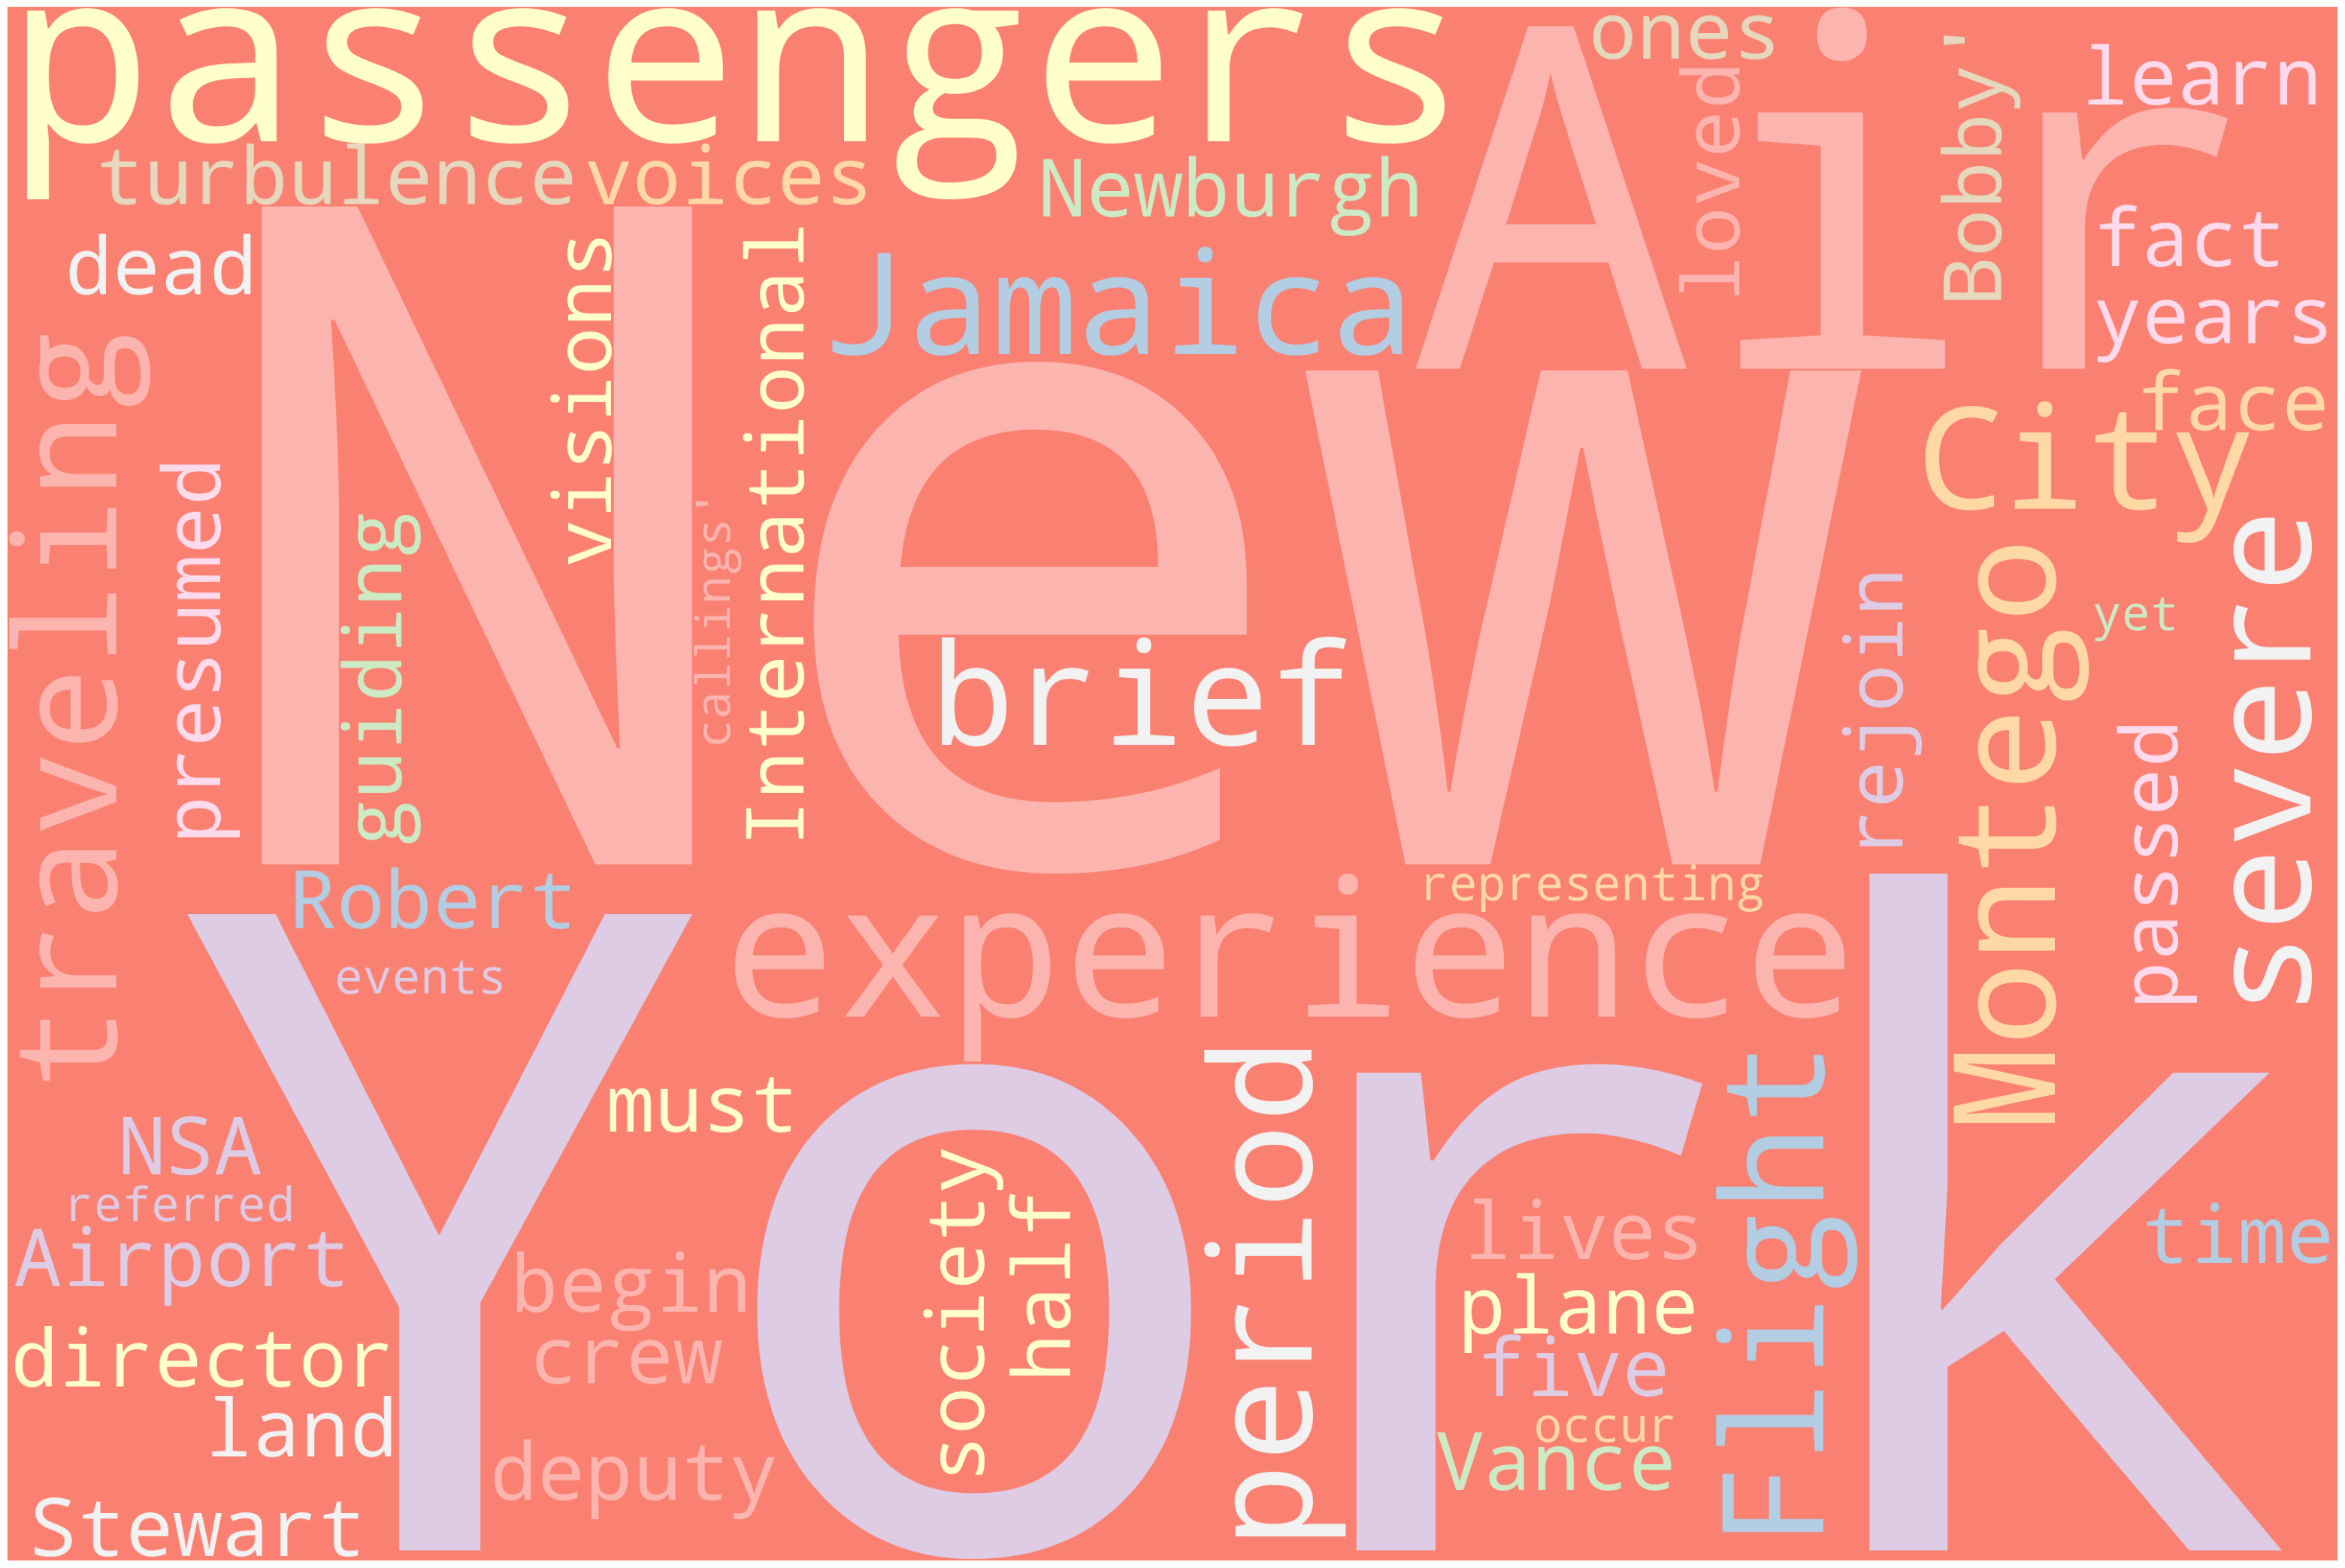

In [437]:
# MODIFIED FROM 
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

page = "While traveling from Jamaica to New York City, Montego Air Flight 828 experiences a brief period of severe turbulence. When they land at Stewart International Airport in Newburgh, New York, the plane's 191 passengers and crew learn from NSA deputy director Robert 'Bobby' Vance that over five and a half years have passed while they were in the air, during which time they were presumed dead. As they rejoin society, the passengers must face the fact that their lives—and loved ones—are not the same as they were, while they also begin to experience guiding voices and visions representing events yet to occur, referred to as 'callings'."

generate_word_cloud(page)

In [438]:
### IMPORT PACKAGES 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import string 
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# #FILTER OUT UNWANTED WORDS
new_text=""

ManifestPage = "While traveling from Jamaica to New York City, Montego Air Flight 828 experiences a brief period of severe turbulence. When they land at Stewart International Airport in Newburgh, New York, the plane's 191 passengers and crew learn from NSA deputy director Robert 'Bobby' Vance that over five and a half years have passed while they were in the air, during which time they were presumed dead. As they rejoin society, the passengers must face the fact that their lives—and loved ones—are not the same as they were, while they also begin to experience guiding voices and visions representing events yet to occur, referred to as 'callings'."

for word in nltk.tokenize.word_tokenize(ManifestPage):
    if word not in nltk.corpus.stopwords.words('english'):
        if word in [".",",","!","?",":",";"]:
            #remove the last space
            new_text=new_text[0:-1] + word + " "
        else: #add a space
            new_text += word.lower() + " "
ManifestPage=new_text
print(ManifestPage)

while traveling jamaica new york city, montego air flight 828 experiences brief period severe turbulence. when land stewart international airport newburgh, new york, plane 's 191 passengers crew learn nsa deputy director robert 'bobby ' vance five half years passed air, time presumed dead. as rejoin society, passengers must face fact lives—and loved ones—are, also begin experience guiding voices visions representing events yet occur, referred 'callings '. 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [439]:
# WEEK 5
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd


sia = SentimentIntensityAnalyzer()
ManifestPage = "while traveling jamaica new york city, montego air flight 828 experiences brief period severe turbulence. when land stewart international airport newburgh, new york, plane 's 191 passengers crew learn nsa deputy director robert 'bobby ' vance five half years passed air, time presumed dead. as rejoin society, passengers must face fact lives—and loved ones—are, also begin experience guiding voices visions representing events yet occur, referred 'callings '. " 
score=sia.polarity_scores(ManifestPage)

print("SCORE:",score)
#WORDS
print("---WORDS---")

scoring = []
for word in ManifestPage.split():
    scores = sia.polarity_scores(word)
    scoring.append({**{'Word': word}, **scores})  # Combine word with its score
    #print(words)
    manifestdf = pd.DataFrame(scoring)
    print(manifestdf.head)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


SCORE: {'neg': 0.092, 'neu': 0.83, 'pos': 0.078, 'compound': -0.2732}
---WORDS---
<bound method NDFrame.head of     Word  neg  neu  pos  compound
0  while  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of         Word  neg  neu  pos  compound
0      while  0.0  1.0  0.0       0.0
1  traveling  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of         Word  neg  neu  pos  compound
0      while  0.0  1.0  0.0       0.0
1  traveling  0.0  1.0  0.0       0.0
2    jamaica  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of         Word  neg  neu  pos  compound
0      while  0.0  1.0  0.0       0.0
1  traveling  0.0  1.0  0.0       0.0
2    jamaica  0.0  1.0  0.0       0.0
3        new  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of         Word  neg  neu  pos  compound
0      while  0.0  1.0  0.0       0.0
1  traveling  0.0  1.0  0.0       0.0
2    jamaica  0.0  1.0  0.0       0.0
3        new  0.0  1.0  0.0       0.0
4       york  0.0  1.0  0.0       0.0>
<bound meth

In [440]:
print(manifestdf.head)
#manifestdf.to_csv("../websitedata/manifest.csv")

<bound method NDFrame.head of          Word  neg  neu  pos  compound
0       while  0.0  1.0  0.0       0.0
1   traveling  0.0  1.0  0.0       0.0
2     jamaica  0.0  1.0  0.0       0.0
3         new  0.0  1.0  0.0       0.0
4        york  0.0  1.0  0.0       0.0
..        ...  ...  ...  ...       ...
62        yet  0.0  1.0  0.0       0.0
63     occur,  0.0  1.0  0.0       0.0
64   referred  0.0  1.0  0.0       0.0
65  'callings  0.0  1.0  0.0       0.0
66         '.  0.0  1.0  0.0       0.0

[67 rows x 5 columns]>


# INVENTING ANNA

In [441]:
import wikipedia

wikipedia.search("Inventing Anna", results=10, suggestion=False)

['Inventing Anna',
 'Anna Sorokin',
 'Julia Garner',
 'Anna Chlumsky',
 'Alexis Floyd',
 'Kacy Duke',
 'Rachel DeLoache Williams',
 'Jessica Pressler',
 'Shonda Rhimes',
 'Marika Domińczyk']

In [442]:
page = wikipedia.WikipediaPage("Inventing Anna").content
print(page)
# this gets text content from the page for Inventing Anna the TV show

Inventing Anna is an American drama television miniseries created by Shonda Rhimes, inspired by the story of Anna Sorokin and the article in New York titled "How Anna Delvey Tricked New York's Party People" by Jessica Pressler. It was produced by Shondaland. Netflix released the miniseries on February 11, 2022.The miniseries stars Julia Garner in the title role. Critics praised its performances (particularly Garner) but criticized its inconsistent tone.


== Premise ==
Inspired by the true story of a total fake. Under the assumed name Anna Delvey, Russian-born Anna Sorokin infiltrated New York's High society by convincing them she was a German socialite and an heiress to a massive fortune, all while scheming and scamming them out of millions.


== Cast and characters ==


=== Main ===
Anna Chlumsky as Vivian Kent
Julia Garner as Anna "Delvey" Sorokin
Arian Moayed as Todd Spodek
Katie Lowes as Rachel Williams
Alexis Floyd as Neff Davis
Anders Holm as Jack
Anna Deavere Smith as Maud
Jeff

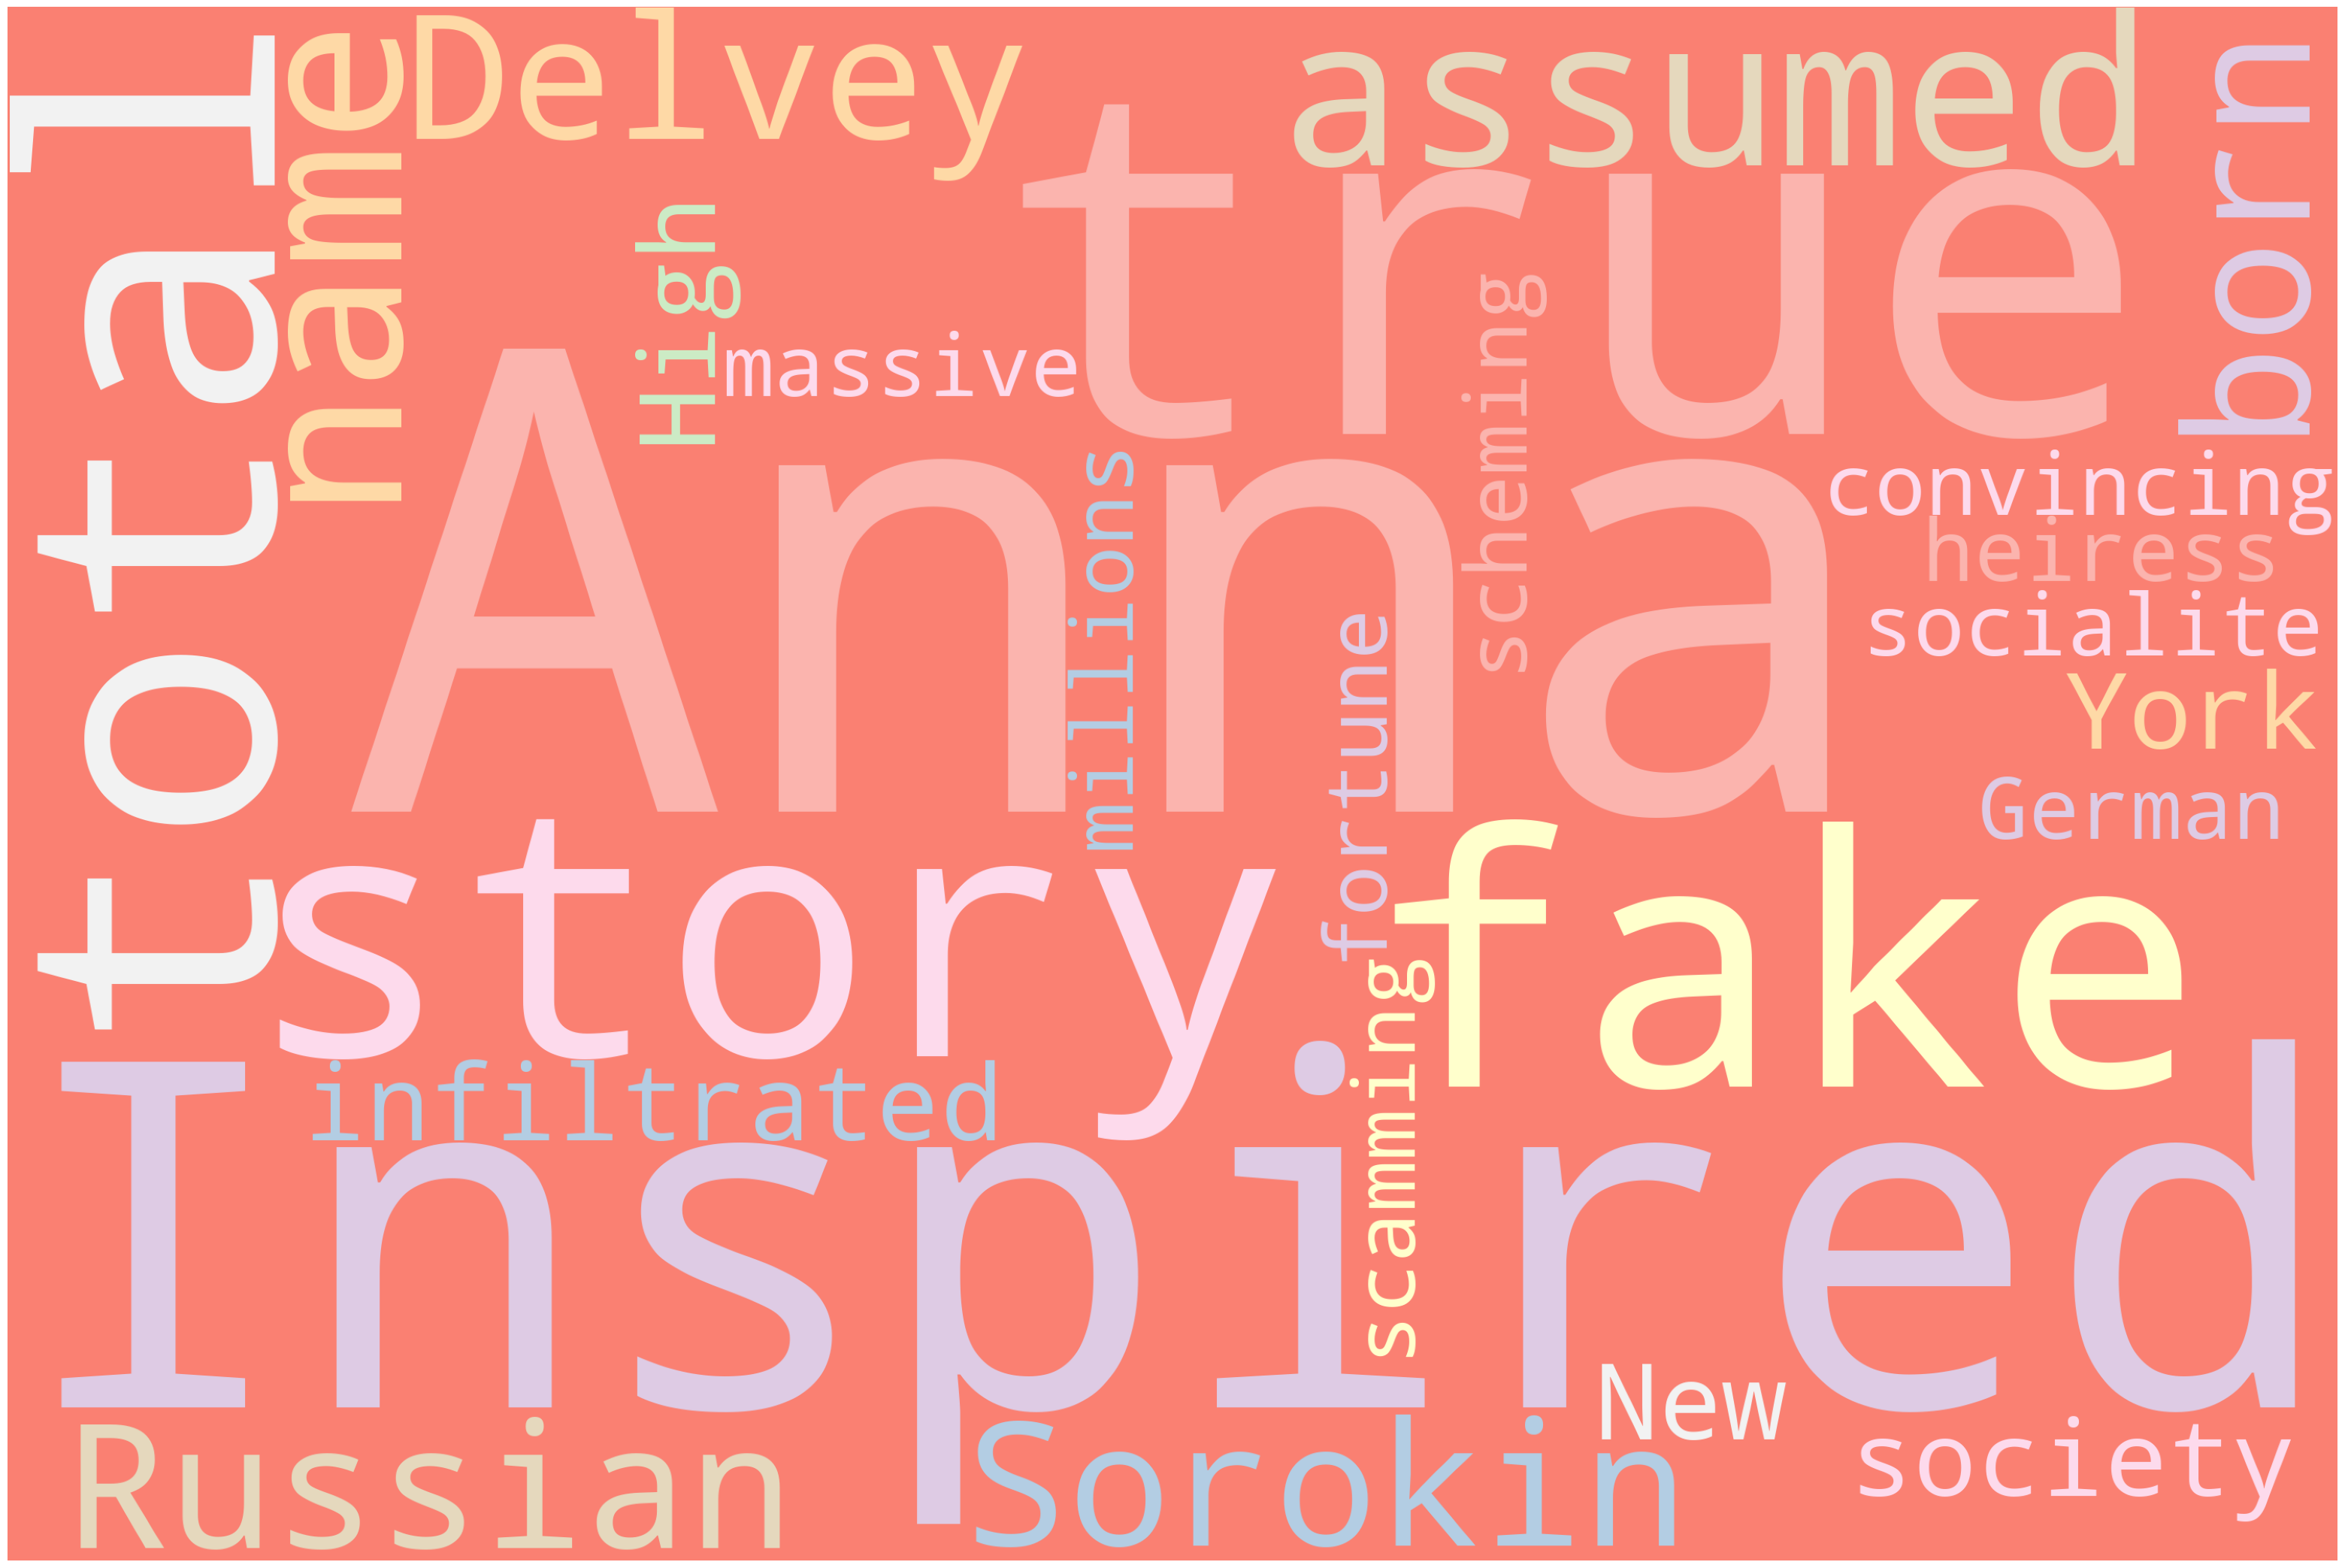

In [443]:
# MODIFIED FROM 
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

page = "Inspired by the true story of a total fake. Under the assumed name Anna Delvey, Russian-born Anna Sorokin infiltrated New York's High society by convincing them she was a German socialite and an heiress to a massive fortune, all while scheming and scamming them out of millions."

generate_word_cloud(page)

In [444]:
### IMPORT PACKAGES 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import string 
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# #FILTER OUT UNWANTED WORDS
new_text=""

AnnaPage = "Inspired by the true story of a total fake. Under the assumed name Anna Delvey, Russian-born Anna Sorokin infiltrated New York's High society by convincing them she was a German socialite and an heiress to a massive fortune, all while scheming and scamming them out of millions."

for word in nltk.tokenize.word_tokenize(AnnaPage):
    if word not in nltk.corpus.stopwords.words('english'):
        if word in [".",",","!","?",":",";"]:
            #remove the last space
            new_text=new_text[0:-1] + word + " "
        else: #add a space
            new_text += word.lower() + " "
AnnaPage=new_text
print(AnnaPage)

inspired true story total fake. under assumed name anna delvey, russian-born anna sorokin infiltrated new york 's high society convincing german socialite heiress massive fortune, scheming scamming millions. 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [445]:
# WEEK 5
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd


sia = SentimentIntensityAnalyzer()
AnnaPage = "inspired true story total fake. under assumed name anna delvey, russian-born anna sorokin infiltrated new york 's high society convincing german socialite heiress massive fortune, scheming scamming millions. " 
score=sia.polarity_scores(AnnaPage)

print("SCORE:",score)
#WORDS
print("---WORDS---")

scoring = []
for word in AnnaPage.split():
    scores = sia.polarity_scores(word)
    scoring.append({**{'Word': word}, **scores})  # Combine word with its score
    #print(words)
    annadf = pd.DataFrame(scoring)
    print(annadf.head)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


SCORE: {'neg': 0.087, 'neu': 0.67, 'pos': 0.243, 'compound': 0.6808}
---WORDS---
<bound method NDFrame.head of        Word  neg  neu  pos  compound
0  inspired  0.0  0.0  1.0    0.4939>
<bound method NDFrame.head of        Word  neg  neu  pos  compound
0  inspired  0.0  0.0  1.0    0.4939
1      true  0.0  0.0  1.0    0.4215>
<bound method NDFrame.head of        Word  neg  neu  pos  compound
0  inspired  0.0  0.0  1.0    0.4939
1      true  0.0  0.0  1.0    0.4215
2     story  0.0  1.0  0.0    0.0000>
<bound method NDFrame.head of        Word  neg  neu  pos  compound
0  inspired  0.0  0.0  1.0    0.4939
1      true  0.0  0.0  1.0    0.4215
2     story  0.0  1.0  0.0    0.0000
3     total  0.0  1.0  0.0    0.0000>
<bound method NDFrame.head of        Word  neg  neu  pos  compound
0  inspired  0.0  0.0  1.0    0.4939
1      true  0.0  0.0  1.0    0.4215
2     story  0.0  1.0  0.0    0.0000
3     total  0.0  1.0  0.0    0.0000
4     fake.  1.0  0.0  0.0   -0.4767>
<bound method NDFrame.he

In [446]:
print(annadf.head)
#annadf.to_csv("../websitedata/anna.csv")

<bound method NDFrame.head of             Word  neg  neu  pos  compound
0       inspired  0.0  0.0  1.0    0.4939
1           true  0.0  0.0  1.0    0.4215
2          story  0.0  1.0  0.0    0.0000
3          total  0.0  1.0  0.0    0.0000
4          fake.  1.0  0.0  0.0   -0.4767
5          under  0.0  1.0  0.0    0.0000
6        assumed  0.0  1.0  0.0    0.0000
7           name  0.0  1.0  0.0    0.0000
8           anna  0.0  1.0  0.0    0.0000
9        delvey,  0.0  1.0  0.0    0.0000
10  russian-born  0.0  1.0  0.0    0.0000
11          anna  0.0  1.0  0.0    0.0000
12       sorokin  0.0  1.0  0.0    0.0000
13   infiltrated  0.0  1.0  0.0    0.0000
14           new  0.0  1.0  0.0    0.0000
15          york  0.0  1.0  0.0    0.0000
16            's  0.0  1.0  0.0    0.0000
17          high  0.0  1.0  0.0    0.0000
18       society  0.0  1.0  0.0    0.0000
19    convincing  0.0  0.0  1.0    0.4019
20        german  0.0  1.0  0.0    0.0000
21     socialite  0.0  1.0  0.0    0.0000
22  

# DAHMER

In [447]:
import wikipedia

wikipedia.search("Dahmer", results=10, suggestion=False)

['Jeffrey Dahmer',
 'Dahmer – Monster: The Jeffrey Dahmer Story',
 'Lionel Dahmer',
 'Dahmer (film)',
 'My Friend Dahmer (film)',
 'Christopher Scarver',
 'Dahmer (surname)',
 'Dahmer (disambiguation)',
 'Vernon Dahmer',
 'Evan Peters']

In [448]:
page = wikipedia.WikipediaPage("Dahmer - Monster: The Jeffrey Dahmer Story").content
print(page)
# this gets text content from the page for Dahmer - Monster: The Jeffrey Dahmer Story the TV show

Dahmer – Monster: The Jeffrey Dahmer Story is the first season of the American true crime anthology series, Monster, created by Ryan Murphy and Ian Brennan for Netflix, which was released on September 21, 2022. Murphy also serves as showrunner and is an executive producer along with Brennan.
Dahmer is about the life of serial killer Jeffrey Dahmer (Evan Peters). Other main characters include Dahmer's father Lionel (Richard Jenkins), his stepmother Shari (Molly Ringwald), suspicious neighbor Glenda (Niecy Nash), and grandmother Catherine (Michael Learned).
Dahmer received mixed reviews, but was ultimately a commercial success, reaching the number-one spot on Netflix in the first week of its release. It became Netflix's second most-watched English-language series of all time within 28 days,  and the third Netflix series to pass 1 billion views in 60 days. The series reached number one on the Nielsen Top 10 streaming chart in the first week of its release, and placed No. 7 on Nielsen's al

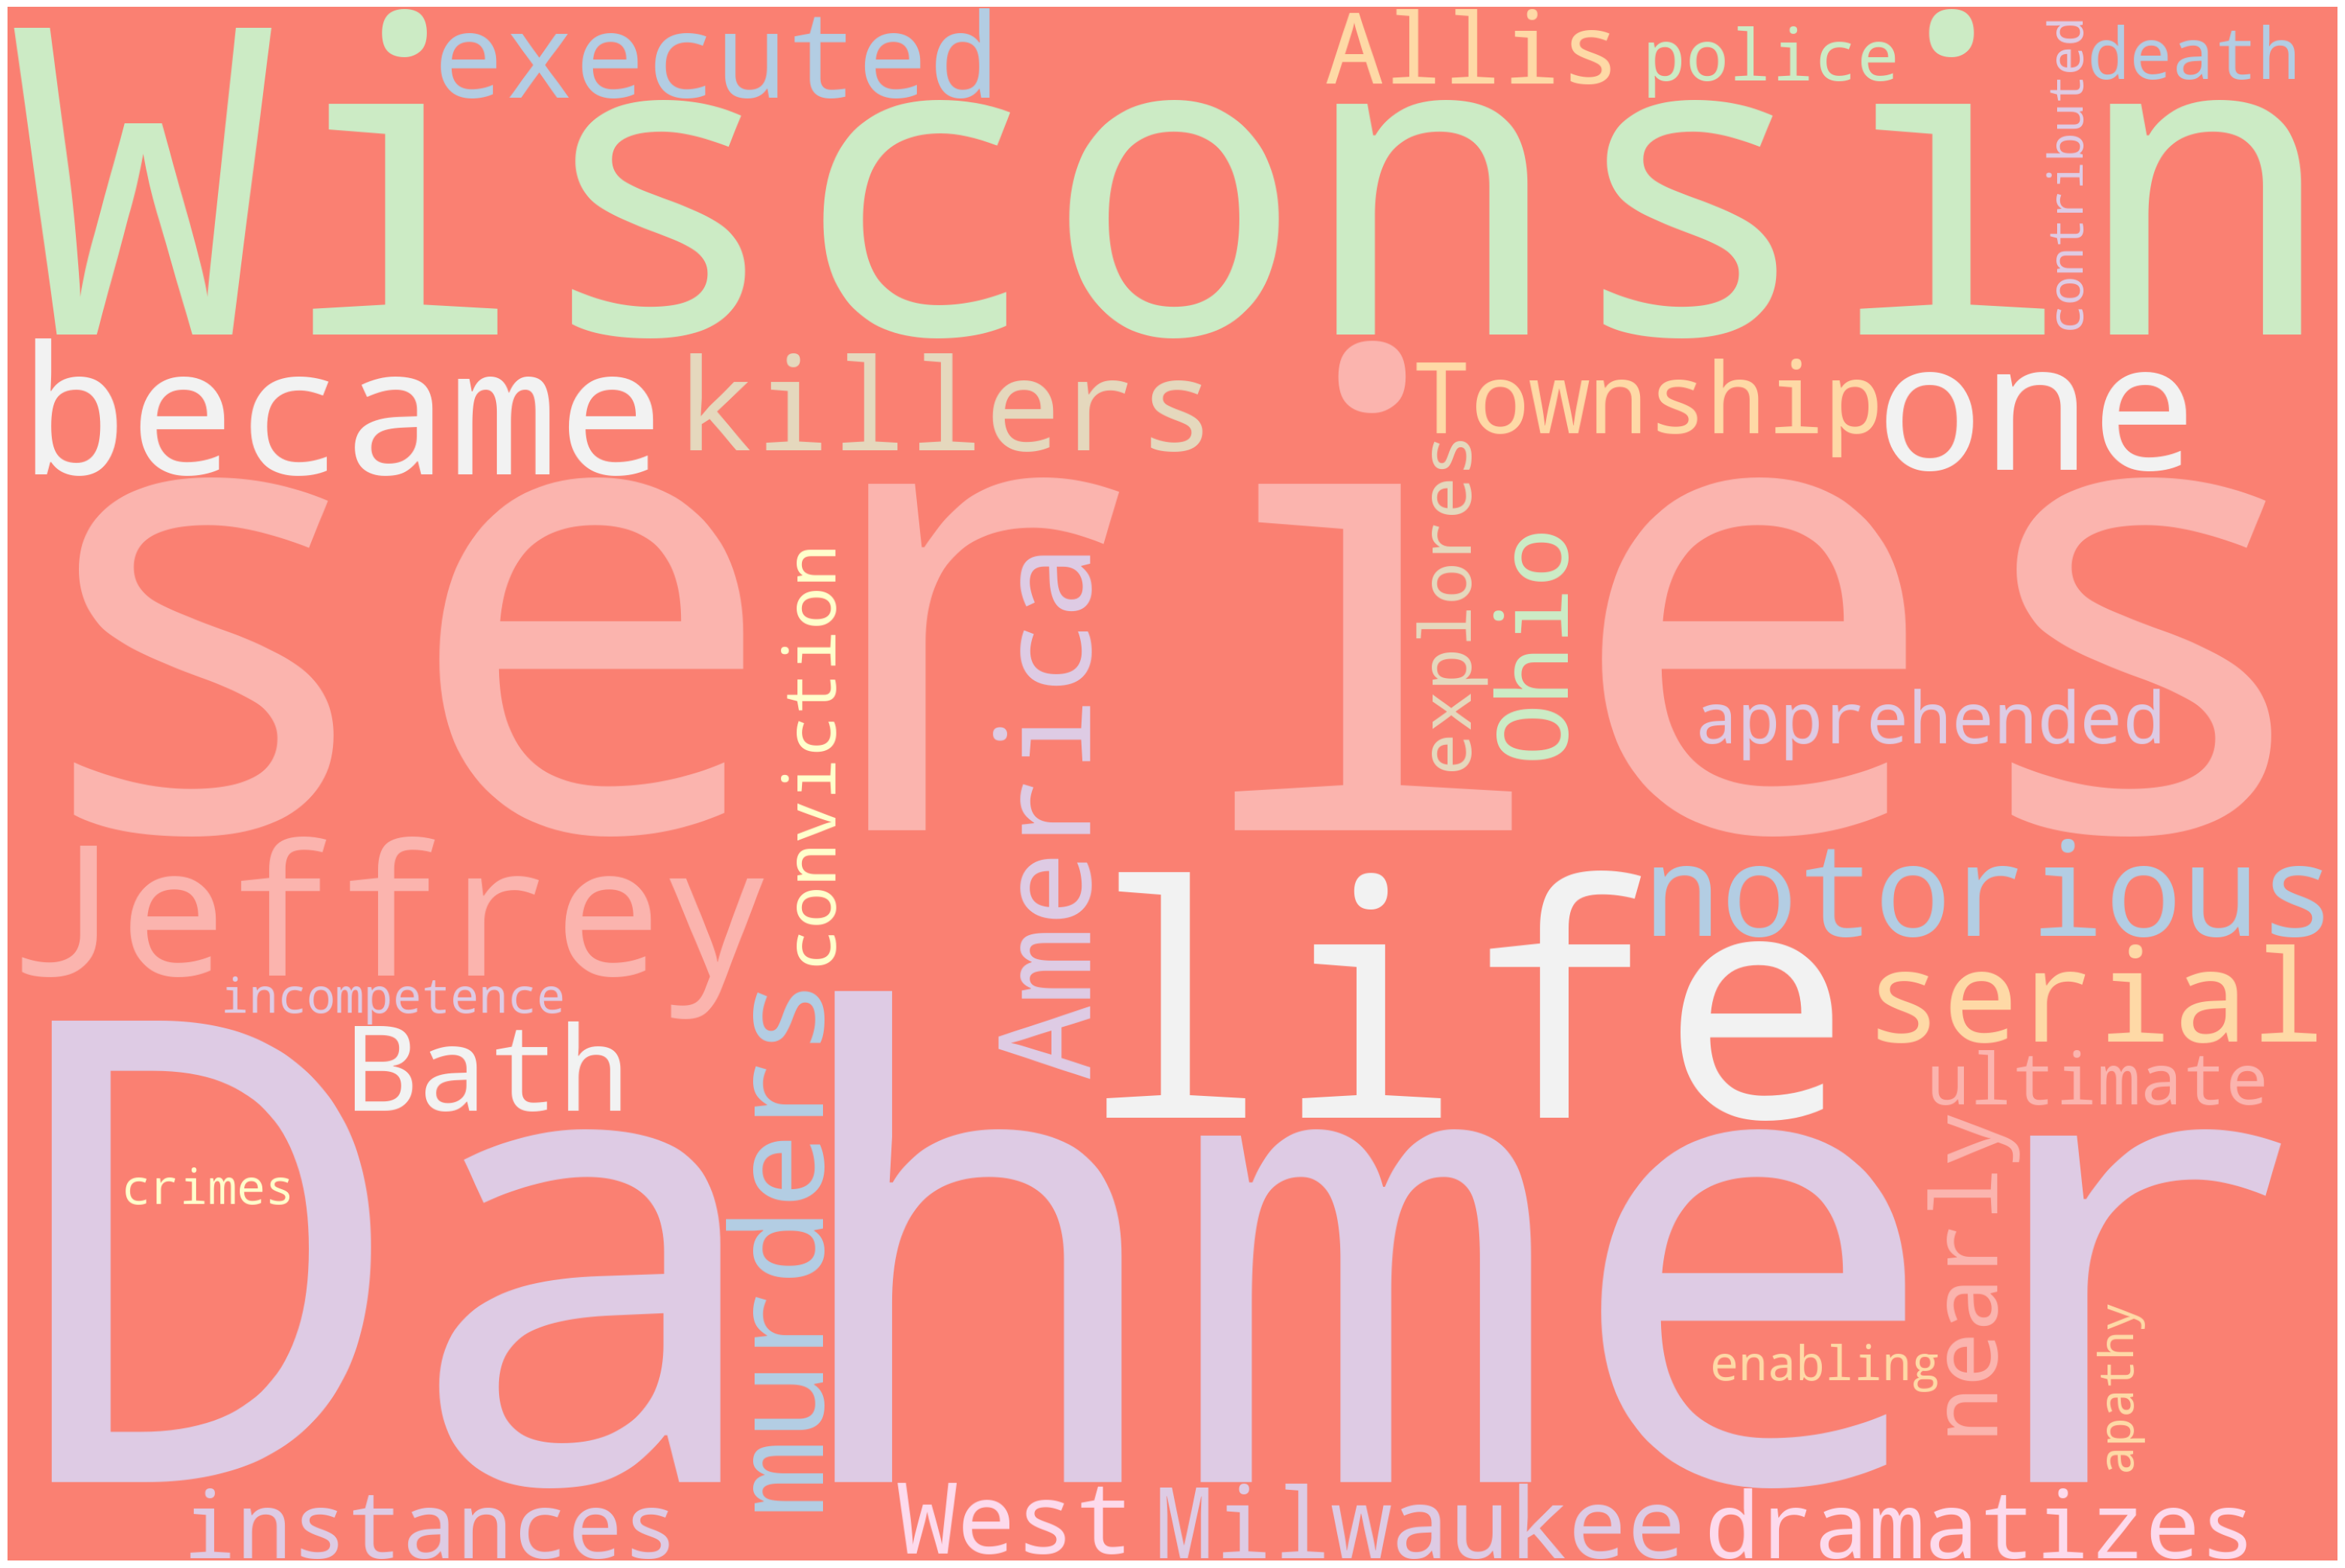

In [449]:
# MODIFIED FROM 
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

page = "The series is about the life of Jeffrey Dahmer, and how he became one of the most notorious serial killers in America. His murders were executed in Bath Township, Ohio, West Allis, Wisconsin, and Milwaukee, Wisconsin between 1978 and 1991. The series dramatizes instances where Dahmer was nearly apprehended until his ultimate conviction and death. It also explores how police incompetence and apathy contributed to enabling his crimes."

generate_word_cloud(page)

In [450]:
### IMPORT PACKAGES 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import string 
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# #FILTER OUT UNWANTED WORDS
new_text=""

DahmerPage = "The series is about the life of Jeffrey Dahmer, and how he became one of the most notorious serial killers in America. His murders were executed in Bath Township, Ohio, West Allis, Wisconsin, and Milwaukee, Wisconsin between 1978 and 1991. The series dramatizes instances where Dahmer was nearly apprehended until his ultimate conviction and death. It also explores how police incompetence and apathy contributed to enabling his crimes."

for word in nltk.tokenize.word_tokenize(DahmerPage):
    if word not in nltk.corpus.stopwords.words('english'):
        if word in [".",",","!","?",":",";"]:
            #remove the last space
            new_text=new_text[0:-1] + word + " "
        else: #add a space
            new_text += word.lower() + " "
DahmerPage=new_text
print(DahmerPage)

the series life jeffrey dahmer, became one notorious serial killers america. his murders executed bath township, ohio, west allis, wisconsin, milwaukee, wisconsin 1978 1991. the series dramatizes instances dahmer nearly apprehended ultimate conviction death. it also explores police incompetence apathy contributed enabling crimes. 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [451]:
# WEEK 5
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd


sia = SentimentIntensityAnalyzer()
DahmerPage = "the series life jeffrey dahmer, became one notorious serial killers america. his murders executed bath township, ohio, west allis, wisconsin, milwaukee, wisconsin 1978 1991. the series dramatizes instances dahmer nearly apprehended ultimate conviction death. it also explores police incompetence apathy contributed enabling crimes." 
score=sia.polarity_scores(DahmerPage)

print("SCORE:",score)
#WORDS
print("---WORDS---")

scoring = []
for word in DahmerPage.split():
    scores = sia.polarity_scores(word)
    scoring.append({**{'Word': word}, **scores})  # Combine word with its score
    #print(words)
    dahmerdf = pd.DataFrame(scoring)
    print(dahmerdf.head)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


SCORE: {'neg': 0.358, 'neu': 0.642, 'pos': 0.0, 'compound': -0.9666}
---WORDS---
<bound method NDFrame.head of   Word  neg  neu  pos  compound
0  the  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of      Word  neg  neu  pos  compound
0     the  0.0  1.0  0.0       0.0
1  series  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of      Word  neg  neu  pos  compound
0     the  0.0  1.0  0.0       0.0
1  series  0.0  1.0  0.0       0.0
2    life  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of       Word  neg  neu  pos  compound
0      the  0.0  1.0  0.0       0.0
1   series  0.0  1.0  0.0       0.0
2     life  0.0  1.0  0.0       0.0
3  jeffrey  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of       Word  neg  neu  pos  compound
0      the  0.0  1.0  0.0       0.0
1   series  0.0  1.0  0.0       0.0
2     life  0.0  1.0  0.0       0.0
3  jeffrey  0.0  1.0  0.0       0.0
4  dahmer,  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of       Word  neg  neu  pos  co

In [452]:
print(dahmerdf.head)
#dahmerdf.to_csv("../websitedata/dahmer.csv")

<bound method NDFrame.head of             Word  neg  neu  pos  compound
0            the  0.0  1.0  0.0    0.0000
1         series  0.0  1.0  0.0    0.0000
2           life  0.0  1.0  0.0    0.0000
3        jeffrey  0.0  1.0  0.0    0.0000
4        dahmer,  0.0  1.0  0.0    0.0000
5         became  0.0  1.0  0.0    0.0000
6            one  0.0  1.0  0.0    0.0000
7      notorious  1.0  0.0  0.0   -0.4404
8         serial  0.0  1.0  0.0    0.0000
9        killers  1.0  0.0  0.0   -0.6486
10      america.  0.0  1.0  0.0    0.0000
11           his  0.0  1.0  0.0    0.0000
12       murders  1.0  0.0  0.0   -0.6124
13      executed  0.0  1.0  0.0    0.0000
14          bath  0.0  1.0  0.0    0.0000
15     township,  0.0  1.0  0.0    0.0000
16         ohio,  0.0  1.0  0.0    0.0000
17          west  0.0  1.0  0.0    0.0000
18        allis,  0.0  1.0  0.0    0.0000
19    wisconsin,  0.0  1.0  0.0    0.0000
20    milwaukee,  0.0  1.0  0.0    0.0000
21     wisconsin  0.0  1.0  0.0    0.0000
22  

# BRIDGERTON

In [453]:
import wikipedia

wikipedia.search("Bridgerton", results=10, suggestion=False)

['Bridgerton',
 'Bridgerton (novel series)',
 'Queen Charlotte: A Bridgerton Story',
 'Julia Quinn',
 'List of Bridgerton characters',
 'Music of Bridgerton',
 'Regé-Jean Page',
 'Simone Ashley',
 'Phoebe Dynevor',
 'Nicola Coughlan']

In [454]:
page = wikipedia.WikipediaPage("Bridgerton").content
print(page)
# this gets text content from the page for Bridgerton the TV show

Bridgerton is an American historical fiction-romance streaming television series created by Chris Van Dusen for Netflix. Based on the book series by Julia Quinn, it is Shondaland's first scripted show for Netflix. It revolves around an eponymous fictional family and is set in the competitive world of Regency era London's ton during the social season where marriageable youth of nobility and gentry are launched into society.
The first season debuted on December 25, 2020. The second season premiered on March 25, 2022. The show's record-setting second season, which surpassed season one in viewership, cemented Bridgerton as a franchise per Entertainment Weekly. The series had been renewed for a third and fourth season in April 2021. In May 2023, Queen Charlotte: A Bridgerton Story was released, a spin-off series focused on the character of Queen Charlotte from Bridgerton. 

Bridgerton was critically acclaimed for its direction, actor performances, production and set design, winning two Prim

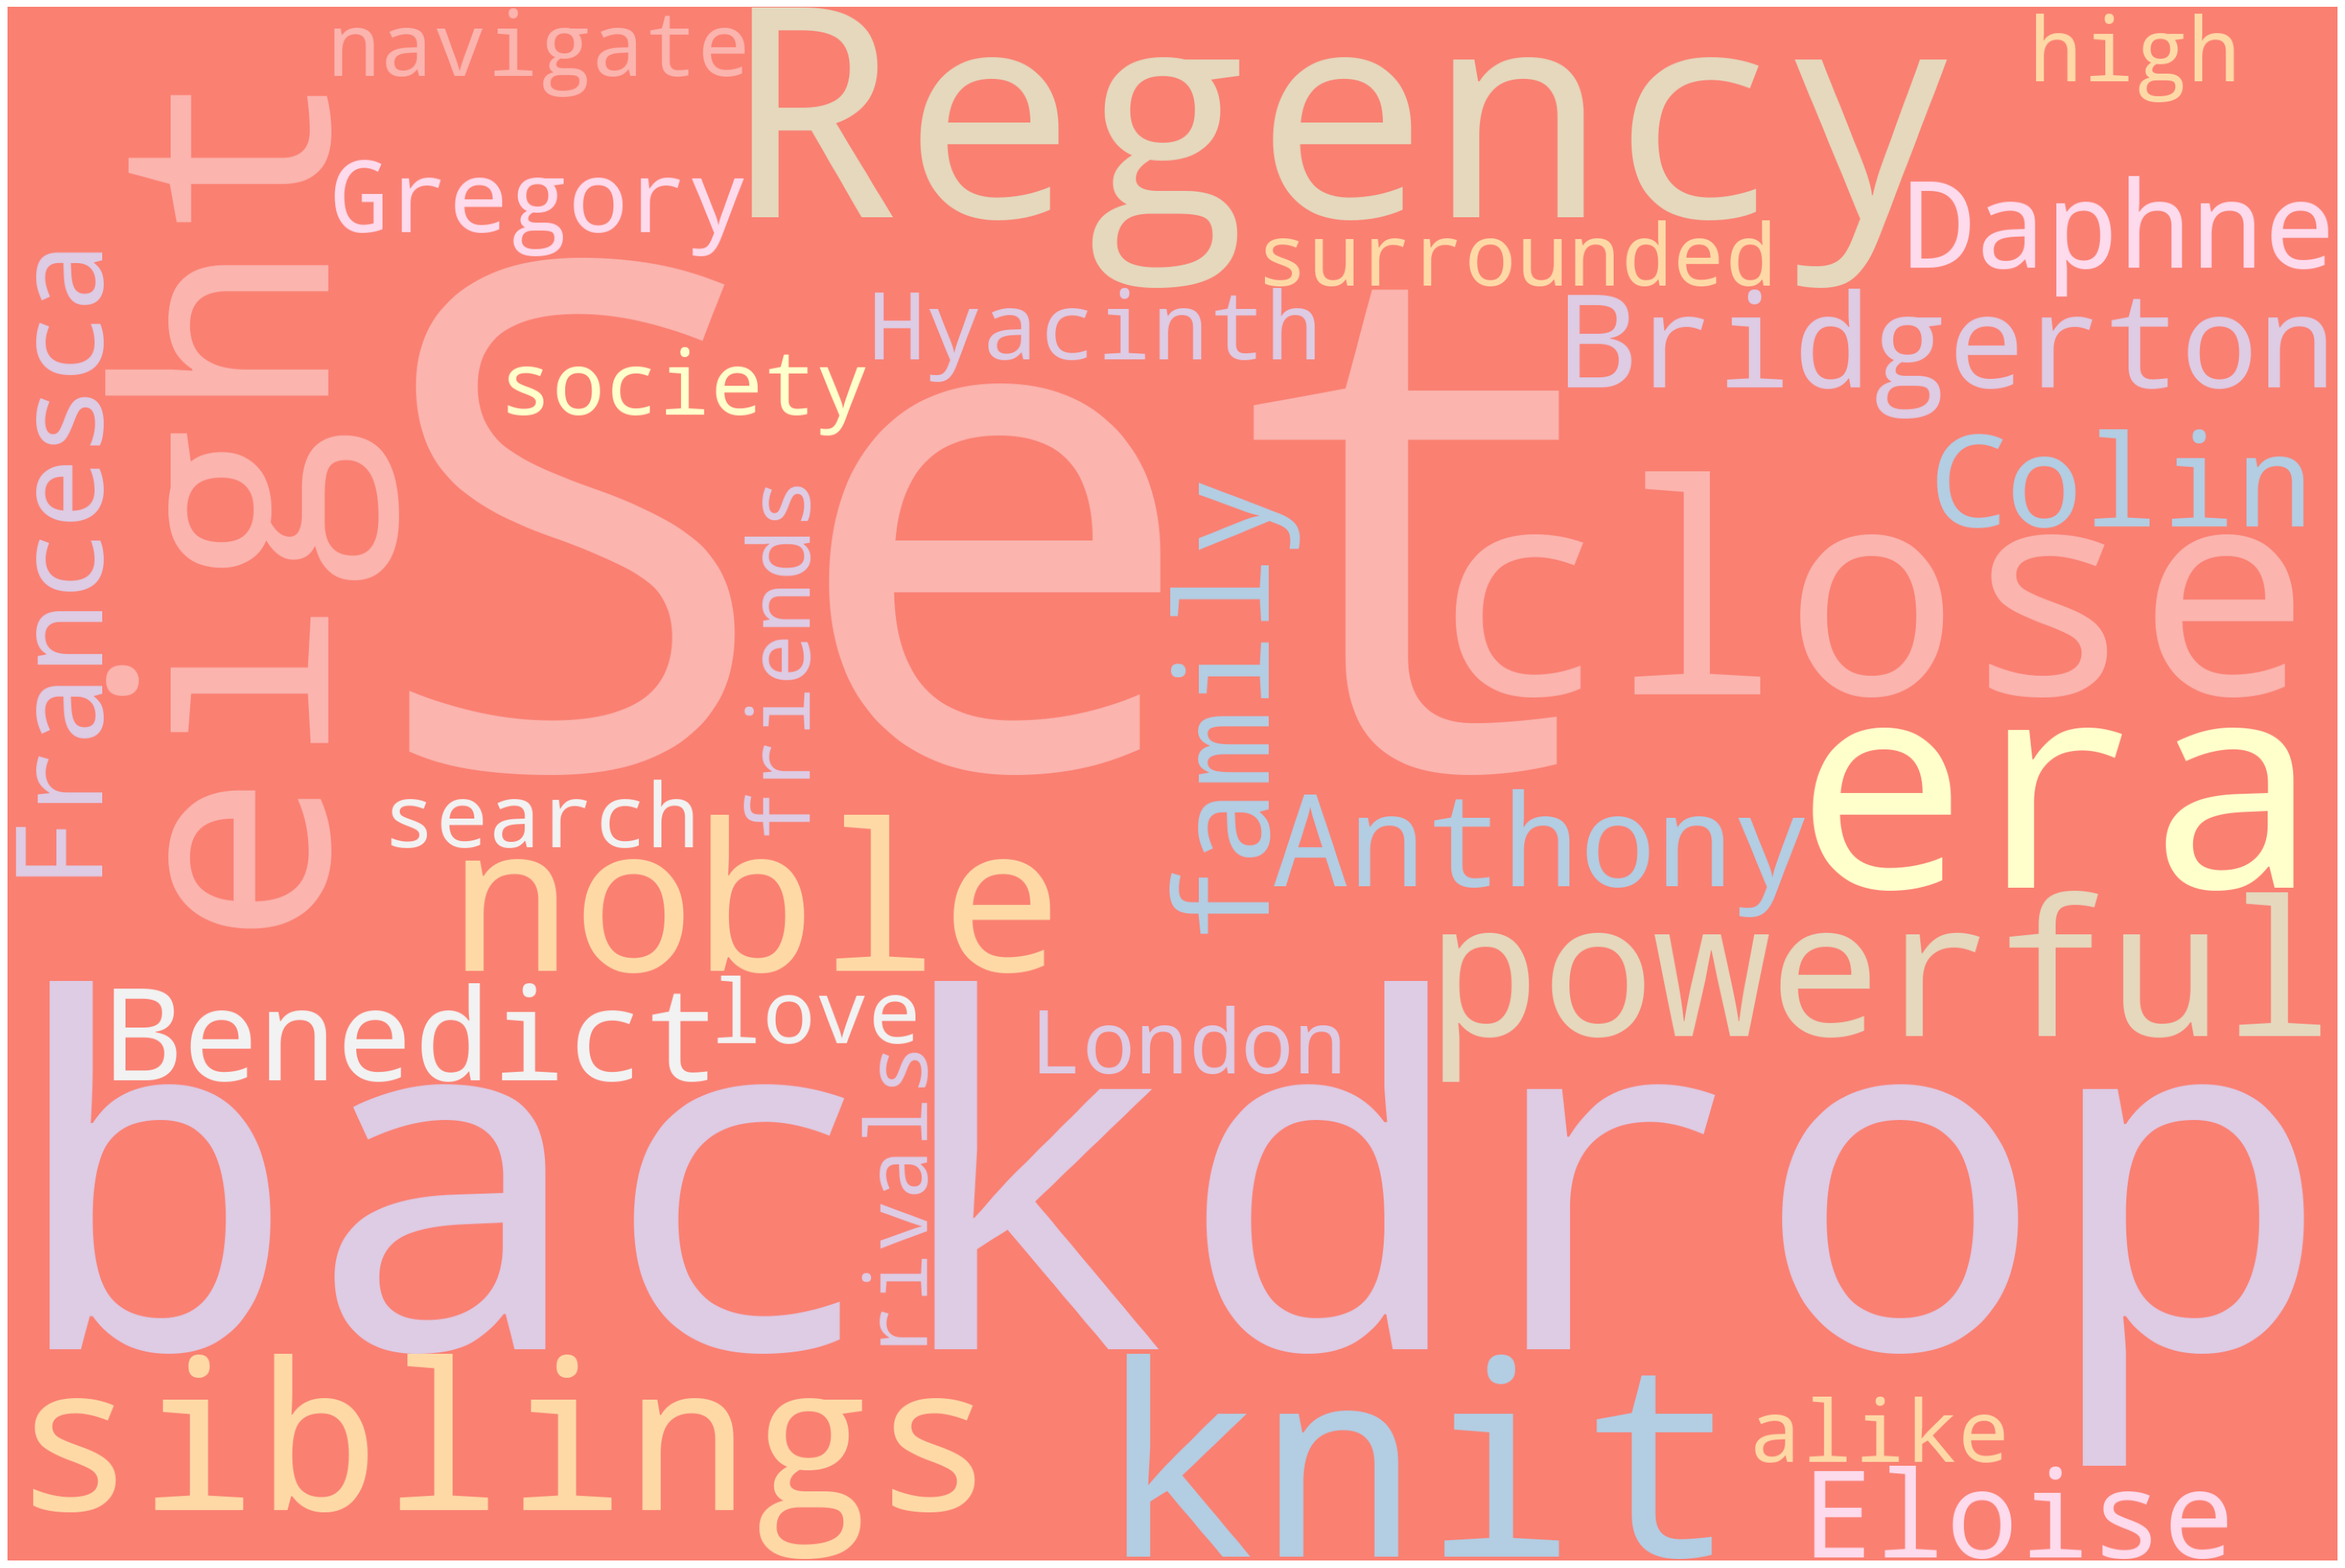

In [455]:
# MODIFIED FROM 
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
def generate_word_cloud(my_text):
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.pyplot as plt
    # exit()
    # Import package
    # Define a function to plot word cloud
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

page = "Set against the backdrop of the Regency era, the eight close-knit siblings of the noble and powerful Bridgerton family – Anthony, Benedict, Colin, Daphne, Eloise, Francesca, Gregory and Hyacinth – navigate London high society in search of love, surrounded by friends and rivals alike."

generate_word_cloud(page)

In [456]:
### IMPORT PACKAGES 
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import string 
import nltk 
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# #FILTER OUT UNWANTED WORDS
new_text=""

BridgePage = "Set against the backdrop of the Regency era, the eight close-knit siblings of the noble and powerful Bridgerton family – Anthony, Benedict, Colin, Daphne, Eloise, Francesca, Gregory and Hyacinth – navigate London high society in search of love, surrounded by friends and rivals alike."

for word in nltk.tokenize.word_tokenize(BridgePage):
    if word not in nltk.corpus.stopwords.words('english'):
        if word in [".",",","!","?",":",";"]:
            #remove the last space
            new_text=new_text[0:-1] + word + " "
        else: #add a space
            new_text += word.lower() + " "
BridgePage=new_text
print(BridgePage)

set backdrop regency era, eight close-knit siblings noble powerful bridgerton family – anthony, benedict, colin, daphne, eloise, francesca, gregory hyacinth – navigate london high society search love, surrounded friends rivals alike. 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [457]:
# WEEK 5
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd


sia = SentimentIntensityAnalyzer()
BridgePage = "set backdrop regency era, eight close-knit siblings noble powerful bridgerton family – anthony, benedict, colin, daphne, eloise, francesca, gregory hyacinth – navigate london high society search love, surrounded friends rivals alike." 
score=sia.polarity_scores(BridgePage)

print("SCORE:",score)
#WORDS
print("---WORDS---")

scoring = []
for word in BridgePage.split():
    scores = sia.polarity_scores(word)
    scoring.append({**{'Word': word}, **scores})  # Combine word with its score
    #print(words)
    bridgedf = pd.DataFrame(scoring)
    print(bridgedf.head)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Amand\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


SCORE: {'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.9201}
---WORDS---
<bound method NDFrame.head of   Word  neg  neu  pos  compound
0  set  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of        Word  neg  neu  pos  compound
0       set  0.0  1.0  0.0       0.0
1  backdrop  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of        Word  neg  neu  pos  compound
0       set  0.0  1.0  0.0       0.0
1  backdrop  0.0  1.0  0.0       0.0
2   regency  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of        Word  neg  neu  pos  compound
0       set  0.0  1.0  0.0       0.0
1  backdrop  0.0  1.0  0.0       0.0
2   regency  0.0  1.0  0.0       0.0
3      era,  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of        Word  neg  neu  pos  compound
0       set  0.0  1.0  0.0       0.0
1  backdrop  0.0  1.0  0.0       0.0
2   regency  0.0  1.0  0.0       0.0
3      era,  0.0  1.0  0.0       0.0
4     eight  0.0  1.0  0.0       0.0>
<bound method NDFrame.head of      

In [458]:
print(bridgedf.head)
#bridgedf.to_csv("../websitedata/bridgerton.csv")

<bound method NDFrame.head of           Word  neg  neu  pos  compound
0          set  0.0  1.0  0.0    0.0000
1     backdrop  0.0  1.0  0.0    0.0000
2      regency  0.0  1.0  0.0    0.0000
3         era,  0.0  1.0  0.0    0.0000
4        eight  0.0  1.0  0.0    0.0000
5   close-knit  0.0  1.0  0.0    0.0000
6     siblings  0.0  1.0  0.0    0.0000
7        noble  0.0  0.0  1.0    0.4588
8     powerful  0.0  0.0  1.0    0.4215
9   bridgerton  0.0  1.0  0.0    0.0000
10      family  0.0  1.0  0.0    0.0000
11           –  0.0  0.0  0.0    0.0000
12    anthony,  0.0  1.0  0.0    0.0000
13   benedict,  0.0  1.0  0.0    0.0000
14      colin,  0.0  1.0  0.0    0.0000
15     daphne,  0.0  1.0  0.0    0.0000
16     eloise,  0.0  1.0  0.0    0.0000
17  francesca,  0.0  1.0  0.0    0.0000
18     gregory  0.0  1.0  0.0    0.0000
19    hyacinth  0.0  1.0  0.0    0.0000
20           –  0.0  0.0  0.0    0.0000
21    navigate  0.0  1.0  0.0    0.0000
22      london  0.0  1.0  0.0    0.0000
23        

: 

# Vectorizations of top 3

# HISTOGRAMS for wikis